In [12]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential


In [13]:
DATA_TRAIN_PATH = os.path.join("D:\\DATA\\STU\\Thesis\\TrinhTanDat_19133001_Thesis\\data")
sequence_length = 30

In [14]:
actions_train = np.array(["nothing", "a", "aa", "aw", "e", "ee", "u" ,"uw" , "o", "oo", "ow", "sac", "hoi", "huyen", "nang", "nga"])
label_map = {label:num for num, label in enumerate(actions_train)}
print(label_map)

{'nothing': 0, 'a': 1, 'aa': 2, 'aw': 3, 'e': 4, 'ee': 5, 'u': 6, 'uw': 7, 'o': 8, 'oo': 9, 'ow': 10, 'sac': 11, 'hoi': 12, 'huyen': 13, 'nang': 14, 'nga': 15}


In [15]:
sequences_train, labels_train = [], []
for action in actions_train:
    for sequence in np.array(os.listdir(os.path.join(DATA_TRAIN_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_TRAIN_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences_train.append(window)
        labels_train.append(label_map[action])

In [16]:
X = np.array(sequences_train)
y = to_categorical(labels_train).astype(int)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, Flatten, LSTM

In [18]:
model = Sequential()
model.add(Bidirectional(LSTM(units=256, return_sequences=True), input_shape=(30,63)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(actions_train.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['categorical_accuracy'])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model.summary()


Num GPUs Available:  0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 30, 512)           655360    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 30, 256)           656384    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 30, 256)           0         
                                                                 
 flatten (Flatten)           (None, 7680)              0         
                                                                 
 dense (Dense)               (

In [19]:
history = model.fit(X_train, y_train, epochs=100,batch_size=8, validation_data=(X_val,y_val))

Epoch 1/100


172/172 [==============================] - 24s 104ms/step - loss: 0.0381 - categorical_accuracy: 0.5182 - val_loss: 0.0158 - val_categorical_accuracy: 0.8198
Epoch 2/100
172/172 [==============================] - 16s 96ms/step - loss: 0.0091 - categorical_accuracy: 0.9070 - val_loss: 0.0093 - val_categorical_accuracy: 0.9012
Epoch 3/100
172/172 [==============================] - 17s 96ms/step - loss: 0.0048 - categorical_accuracy: 0.9506 - val_loss: 0.0026 - val_categorical_accuracy: 0.9767
Epoch 4/100
172/172 [==============================] - 17s 97ms/step - loss: 0.0024 - categorical_accuracy: 0.9760 - val_loss: 0.0024 - val_categorical_accuracy: 0.9709
Epoch 5/100
172/172 [==============================] - 16s 93ms/step - loss: 0.0023 - categorical_accuracy: 0.9782 - val_loss: 0.0030 - val_categorical_accuracy: 0.9709
Epoch 6/100
172/172 [==============================] - 16s 93ms/step - loss: 0.0036 - categorical_accuracy: 0.9593 - val_loss: 0.0011 - val_categorical_

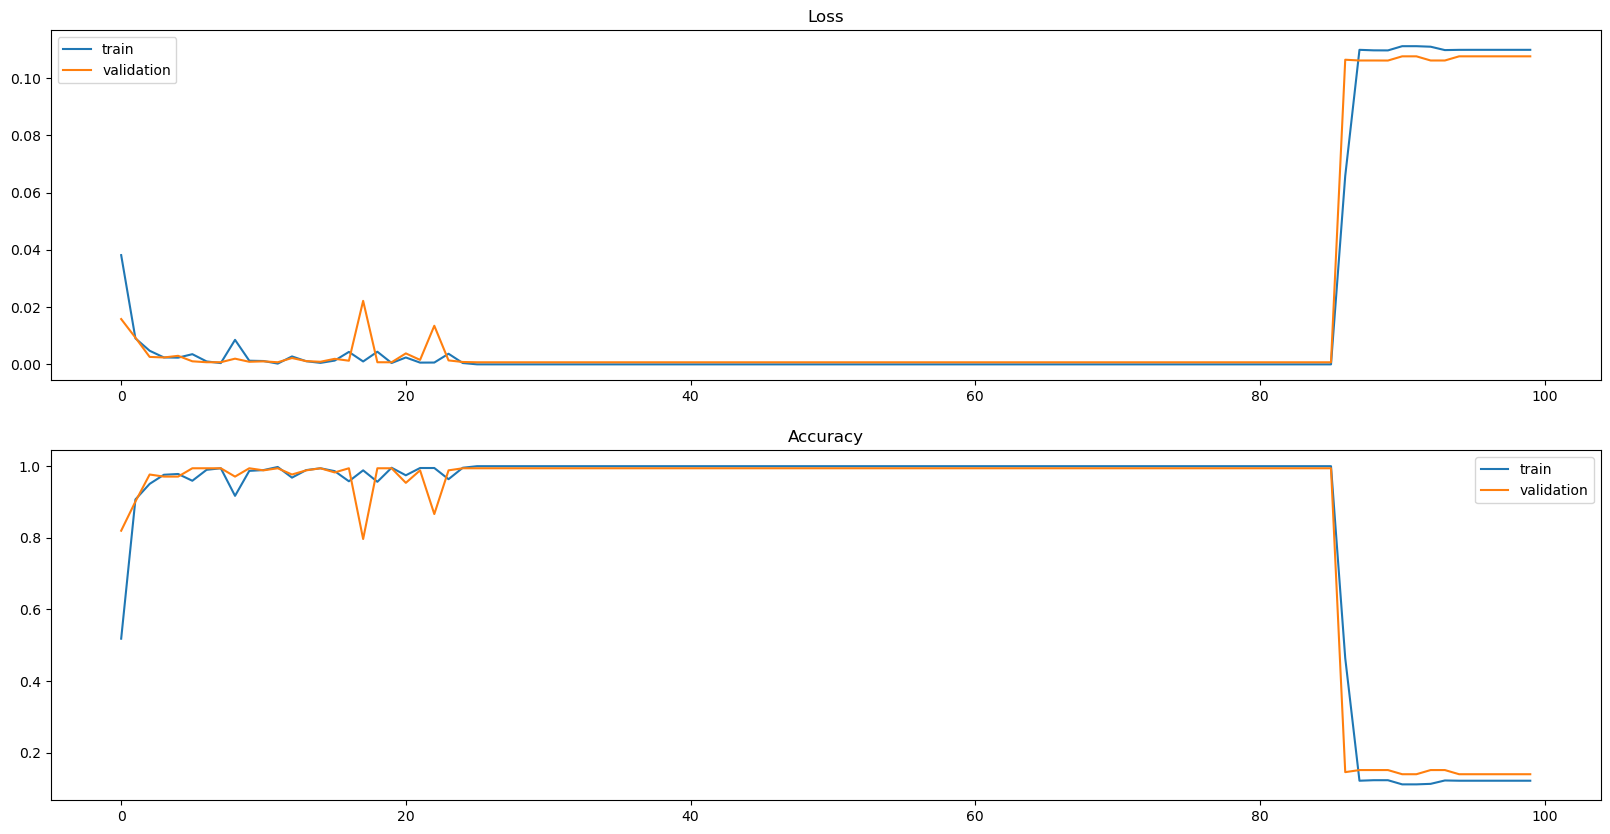

In [20]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(20,10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['categorical_accuracy'], label='train')
pyplot.plot(history.history['val_categorical_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [21]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

6/6 [==============================] - 2s 26ms/step
Accuracy: 0.087209
Precision: 0.064801
Recall: 0.125000
F1 score: 0.066938
ROC AUC: 0.530658
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0]]


c:\Users\dat\miniconda3\envs\doan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


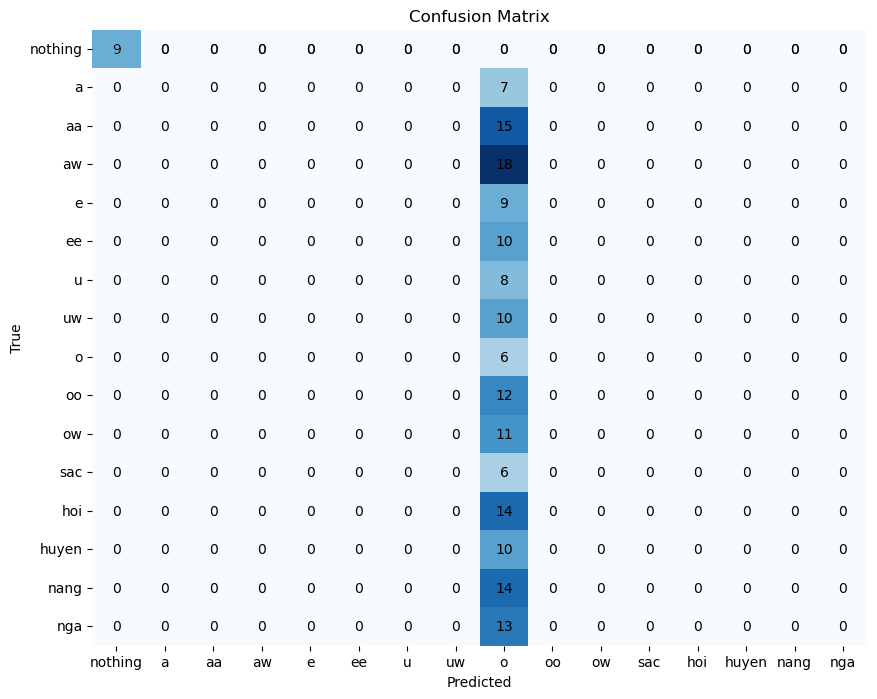

In [22]:
y_hat = model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_hat, multi_class='ovr')
print('ROC AUC: %f' % auc)

matrix = confusion_matrix(y_test_label, y_pred)
print(matrix)


import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["nothing", "a", "aa", "aw", "e", "ee", "u" ,"uw" , "o", "oo", "ow", "sac", "hoi", "huyen", "nang", "nga"],
            yticklabels=["nothing", "a", "aa", "aw", "e", "ee", "u" ,"uw" , "o", "oo", "ow", "sac", "hoi", "huyen", "nang", "nga"])

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        plt.text(j + 0.5, i + 0.5, str(matrix[i, j]), ha='center', va='center')
        
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
model.save('Model_Bidirectional.h5')

c:\Users\dat\miniconda3\envs\doan\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_quant_model = converter.convert()

# Save the quantized model to file
with open('Bidirectional_Quantized_Model.tflite', 'wb') as f:
    f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: C:\Users\dat\AppData\Local\Temp\tmptauq9ylh\assets


INFO:tensorflow:Assets written to: C:\Users\dat\AppData\Local\Temp\tmptauq9ylh\assets
